<a href="https://colab.research.google.com/github/sehrishmastoor2166/QMSS-GR5074_Spring2022/blob/main/shm2166_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img width="50%" src="https://aimodelsharecontent.s3.amazonaws.com/aimodshare_banner.jpg" /></p>


---

## ai model username: shm2166

In [1]:
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import svm, datasets 
from sklearn.model_selection import cross_val_score 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from statistics import mean
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Get data in and set up X_train, X_test, y_train objects

In [2]:
#install aimodelshare library
! pip install aimodelshare --upgrade

     |████████████████████████████████| 131 kB 14.0 MB/s 
     |████████████████████████████████| 12.8 MB 39.3 MB/s 
     |████████████████████████████████| 178 kB 43.3 MB/s 
     |████████████████████████████████| 146 kB 50.7 MB/s 
     |████████████████████████████████| 96 kB 5.0 MB/s 
     |████████████████████████████████| 435 kB 38.8 MB/s 
     |████████████████████████████████| 22.3 MB 4.6 MB/s 
     |████████████████████████████████| 300 kB 39.8 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
     |████████████████████████████████| 127 kB 41.1 MB/s 
     |████████████████████████████████| 7.7 MB 31.5 MB/s 
     |████████████████████████████████| 4.9 MB 41.1 MB/s 
     |████████████████████████████████| 273 kB 45.6 MB/s 
     |████████████████████████████████| 131 kB 40.1 MB/s 
     |████████████████████████████████| 79 kB 3.9 MB/s 
     |████████████████████████████████| 53 kB 1.2 MB/s 
     |████████████████████████████████| 87 kB 3.7 MB/s 
     |█████████████████

In [3]:
# Get competition data
from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/world_happiness_competition_data-repository:latest') 


Data downloaded successfully.


In [4]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()
y_train_labels

0      Very High
1            Low
2            Low
3           High
4      Very High
         ...    
99       Average
100          Low
101    Very High
102      Average
103          Low
Length: 104, dtype: object

Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [6]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [7]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(104, 26)

## Homework 1 

## 1. Explore bivariate results (Use visualizations!) -- Describe any relationships you see between particular features and the target variable

In [8]:
df = X_train.join(y_train) 
df.head()
#Un-dummify the y dataset and add a Happiness column  
df_col = y_train.eq(1).idxmax (axis=1) 
df_col = df_col.to_frame() 
df_col.columns= ['Happiness'] 
df_col.head()
df = df.join(df_col)
df

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,Average,High,Low,Very High,Very Low,Happiness
0,Saudi Arabia,1.403,1.357,0.795,0.439,0.080,0.132,Saudi Arabia,Asia,Western Asia,173.000000,0,0,0,1,0,Very High
1,Georgia,0.886,0.666,0.752,0.346,0.043,0.164,Georgia,Asia,Western Asia,18.000000,0,0,1,0,0,Low
2,Guinea,0.380,0.829,0.375,0.332,0.207,0.086,Guinea,Africa,Sub-Saharan Africa,3.000000,0,0,1,0,0,Low
3,Lithuania,1.238,1.515,0.818,0.291,0.043,0.042,Lithuania,Europe,Northern Europe,125.611111,0,1,0,0,0,High
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Europe,Western Europe,1.000000,0,0,0,1,0,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Libya,1.044,1.303,0.673,0.416,0.133,0.152,Libya,Africa,Northern Africa,1448.000000,1,0,0,0,0,Average
100,Albania,0.947,0.848,0.874,0.383,0.178,0.027,Albania,Europe,Southern Europe,9.000000,0,0,1,0,0,Low
101,United Kingdom,1.333,1.538,0.996,0.450,0.348,0.278,United Kingdom,Europe,Northern Europe,339.000000,0,0,0,1,0,Very High
102,China,1.029,1.125,0.893,0.521,0.058,0.100,China,Asia,Eastern Asia,37.000000,1,0,0,0,0,Average


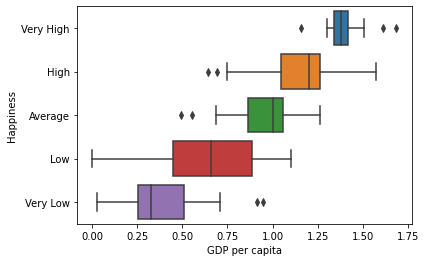

In [9]:
# To see the relationship between Happiness and GDP per capita 

df['GDP per capita']
sns.boxplot(x= "GDP per capita", y="Happiness",
              order = ['Very High', 'High', 'Average', 'Low', 'Very Low'],
                        data=df)

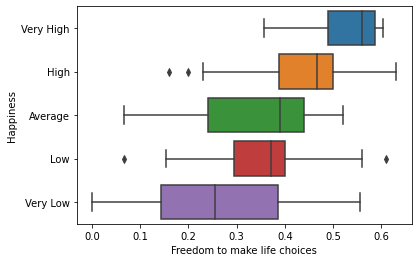

In [10]:
# To see the relationship between Happiness and Freedom to make life choices 

df['Freedom to make life choices']
sns.boxplot(x= "Freedom to make life choices", y="Happiness",
              order = ['Very High', 'High', 'Average', 'Low', 'Very Low'],
                        data=df)


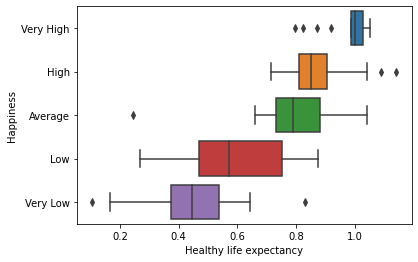

In [11]:
# To see the relationship between Happiness and Healthy life expectancy 

df['Healthy life expectancy']
sns.boxplot(x= "Healthy life expectancy", y="Happiness",
              order = ['Very High', 'High', 'Average', 'Low', 'Very Low'],
                        data=df)

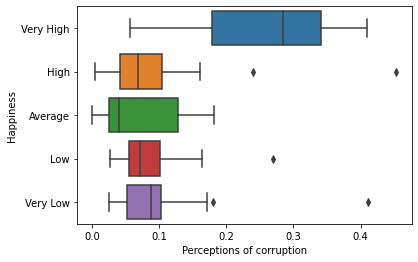

In [12]:
# To see the relationship between Happiness and Perceptions of Corruption

df['Perceptions of corruption']
sns.boxplot(x= "Perceptions of corruption", y="Happiness",
              order = ['Very High', 'High', 'Average', 'Low', 'Very Low'],
                        data=df)

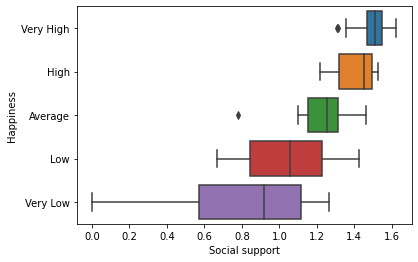

In [13]:
# To see the relationship between Happiness and Social Support

df['Social support']
sns.boxplot(x= "Social support", y="Happiness",
           order = ['Very High', 'High', 'Average', 'Low', 'Very Low'],
                        data=df)

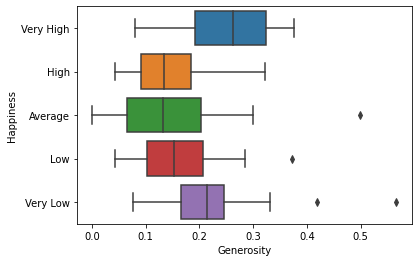

In [14]:
# To see the relationship between Happiness and Generosity 

df['Generosity']
sns.boxplot(x= "Generosity", y="Happiness",
              order = ['Very High', 'High', 'Average', 'Low', 'Very Low'],
                        data=df)

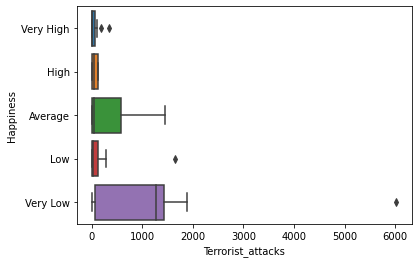

In [15]:
# To see the relationship between Happiness and Terrorist attacks 

df['Terrorist_attacks']
sns.boxplot(x= "Terrorist_attacks", y="Happiness",
              order = ['Very High', 'High', 'Average', 'Low', 'Very Low'],
                        data=df)



Given the plots above the variables social support, freedom to make own choices, healthy life expectancy and gdp per capita have a positive relationship with happiness. These relationships make sense as such variables play a pivotal role in improving an individuals well being, which is vital in determining ones happiness. The box plots show that for social support, healthy life expectancy and gdp per capita the variance is quite small. It is interestign to see that for perceptions of corruption, and generosity, when happiness is very high the variance is also large. Moreover, with social support and freedom to make life choises, when happiness is very low the variance is large. Additionally,  terrorist attacks have the largest variance when happiness is very low. 

To conclude  the variables; social support, freedom to make own choices, healthy life expectancy and gdp per capita have a meaningful relationship with happiness. Happiness increases as the amount of these variables increase. 

## 2. Examine features that predict happiness categories using one or more models that allow for automatic feature selection. -- Explain any meaningful findings

Model 1: Logistic Regression using Cross Validation

In [16]:
logreg = LogisticRegression( solver='liblinear', penalty = 'l2', 
                                max_iter=10000)
logreg.fit(preprocessor(X_train), y_train_labels)

print("cross_validation_score = {:.5f}".format
      (np.mean(cross_val_score(logreg, preprocessor(X_train), y_train_labels))))

print("Training set score: {:.5f}".format(logreg.score(preprocessor(X_train), y_train_labels)))
print("Test set score: {:.5f}".format(logreg.score(preprocessor(X_train), y_train_labels)))
print("CV score: {:.5f}".format(np.mean(cross_val_score(logreg, preprocessor(X_train), y_train_labels))))


cross_validation_score = 0.62476
Training set score: 0.79808
Test set score: 0.79808
CV score: 0.62476


In [17]:
param_grid = { 'penalty': ['l1','l2'], "C":[0.001, 0.01, 0.1, 1, 10, 100], 'max_iter':[50, 100, 500, 1000, 5000]}
grid = GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear')
                     ,param_grid=param_grid, cv=15)
grid.fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.5f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.5f}".format(grid.score(preprocessor(X_train), y_train_labels)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


best mean cross-validation score: 0.66508
best parameters: {'C': 0.1, 'max_iter': 50, 'penalty': 'l2'}
test-set score: 0.75000


In [18]:
#The best parameters are penaltly = l2, C = 0.1 and max iter = 50

logreg1 = LogisticRegression(penalty = 'l2', 
                               solver='liblinear', max_iter=50, C = 0.1)
logreg1.fit(preprocessor(X_train), y_train_labels)
print("logreg.coef_: {}".format(logreg1.coef_))
print(X_train.columns)

logreg.coef_: [[-0.01885065  0.01300432  0.14469501 -0.11031025 -0.13013698 -0.28932917
  -0.00230502 -0.23066175 -0.230327   -0.15311243 -0.13969253 -0.03408757
  -0.03408757  0.09083126 -0.00547153 -0.02241663 -0.21409331  0.15952221
  -0.0162337  -0.18482711  0.0214566  -0.11023348  0.1858321  -0.39018395
  -0.14969528 -0.11828089]
 [ 0.16550905  0.35059602  0.20303762  0.15497557 -0.27248317 -0.34965577
  -0.10967621 -0.39288773  0.13949217 -0.13741488 -0.27246417 -0.05767443
  -0.05767443  0.06478637  0.05493271  0.11056457  0.17730158 -0.09502928
  -0.03780941 -0.02258119  0.01219556 -0.08110517 -0.1774851  -0.29785845
  -0.18822434 -0.18296245]
 [-0.21325672 -0.14510951 -0.29463294  0.03964838 -0.2022978  -0.11684863
  -0.37008602 -0.10059833 -0.2032475  -0.07467315 -0.40151692 -0.02535414
  -0.02535414 -0.11236396 -0.07489563 -0.13237664 -0.19091066 -0.11647361
  -0.01233683 -0.11648012  0.00249537  0.09526072 -0.0839282   0.01587528
   0.01483035 -0.06873195]
 [ 0.44077071  0.

The model that I use is logistic regression. The test score is 0.798. After running cross validation to learn what the best parameters in the model are, the reuslts are the following; penalty = l2, C = 0.1 and max iter = 50. The test set score is 0.75. 

I use the L2 penalty in logistic regression. In this model, the variables with minor contributions have their coefficients brought down to 0. All the variables are incorporated in the model before the less contributive ones are zeroed down.

Model 2: PCA

In [19]:
X_train_ = preprocessor(X_train)
pca = PCA(n_components=6)
pca.fit(X_train_)
components = pca.components_

In [20]:
df3 = pd.DataFrame(X_train_)

In [21]:
pca.explained_variance_

array([3.61970037, 1.50293369, 0.84846365, 0.63068691, 0.51553714,
       0.40253738])

In [22]:
pca.explained_variance_ratio_

array([0.41600573, 0.1727295 , 0.09751242, 0.07248373, 0.05924977,
       0.04626291])

In [23]:
df3.pca = pd.DataFrame(components, columns = df3.columns)
df3.pca

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,-0.469820,-0.450864,-0.477283,-0.349056,-0.037379,-0.270050,0.287854,0.159687,-0.016023,-0.008481,-0.120490,-0.014692,-0.014692,-0.005011,-0.007914,-0.008542,-0.008885,0.008502,-0.007138,-0.053801,-0.008813,0.016056,-0.018089,0.151184,-0.002798,-0.040058
1,-0.189690,-0.143455,-0.167612,0.381650,0.680263,0.508765,0.105649,0.062002,-0.029668,0.025580,-0.082531,0.024617,0.024617,0.017484,-0.021381,-0.056407,-0.038904,-0.023175,0.009236,0.023457,0.052768,0.009604,-0.071963,0.085177,-0.032895,0.022381
2,0.230795,0.062043,0.192806,-0.265952,0.113509,0.106760,0.839548,-0.182732,-0.028144,0.108148,0.095061,0.007667,0.007667,-0.015298,0.003724,-0.001919,-0.030200,0.013386,0.002056,0.033450,-0.002974,0.072831,0.037996,-0.196118,0.049865,0.025533
3,-0.022981,0.149302,0.073165,-0.071525,0.641901,-0.659929,-0.126548,-0.185828,0.078681,0.101562,0.011903,-0.006318,-0.006318,0.040407,-0.005208,0.030060,0.082718,-0.051589,-0.004037,-0.060772,0.069904,0.031921,0.092113,-0.134238,-0.035462,-0.049498
4,0.108180,-0.379438,0.223844,-0.654582,0.217694,0.314505,-0.399156,-0.072806,-0.106184,0.086435,0.080966,0.011589,0.011589,-0.025190,0.018655,-0.004230,-0.106725,0.000030,0.000541,0.010156,0.010247,-0.008949,0.041796,-0.072836,0.091672,0.033245
5,0.064991,-0.352578,0.099776,0.272635,-0.153435,-0.070607,-0.023629,-0.192392,0.030646,0.580823,-0.408604,-0.010474,-0.010474,0.049179,0.066838,-0.076480,0.030475,-0.001144,0.000171,-0.143106,0.056059,0.064143,-0.117038,-0.191247,0.344605,-0.071980


Principal component analysis is used for reducing the dimensionality of datasets, by increasing interpretability while minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

In the model run above, according to PCA the 2 most important variables are GDP per capita and social support. These results align well with the visualizations done above. Moreover, the variance of the first vector is 41.6 while the variance of the secondvector is 17.27, indicating that the first 2 variables account fot nearly 58% of the variation in the data.

## 3. Run at least three prediction models to try to predict World Happiness well. -- Discuss which models performed better and point out relevant hyper-parameter values for successful models.


Model 1: Decision Tree 

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1)
tree.fit(preprocessor(X_train), y_train_labels) 
tree.score(preprocessor(X_train), y_train_labels)

print("Training set score: {:.4f}".format(tree.score(preprocessor(X_train), y_train_labels)))
print("Test set score: {:.4f}".format(tree.score(preprocessor(X_train), y_train_labels)))

Training set score: 1.0000
Test set score: 1.0000


In [25]:
# using Gridsearch CV  

param_grid = {'max_depth' : [5, 6, 7, 8, 9]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=10)
grid.fit(preprocessor(X_train), y_train_labels)

print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(preprocessor(X_train), y_train_labels)))

best parameters: {'max_depth': 7}
test-set score: 0.942


Model 2: Support Vector Machines

In [26]:
svc = SVC(kernel='linear', C=10) 
svc.fit(preprocessor(X_train), y_train_labels) 
svc.score(preprocessor(X_train), y_train_labels)

print("Training set score: {:.3f}".format(svc.score(preprocessor(X_train), y_train_labels)))
print("Test set score: {:.3f}".format(svc.score(preprocessor(X_train), y_train_labels)))
print("SVM .coef_: {}".format(svc.coef_))

Training set score: 0.904
Test set score: 0.904
SVM .coef_: [[-2.51053631 -0.90427841 -1.28518306 -0.72876943 -0.80788065 -0.05627842
   2.86710409  0.         -1.15862735  1.13098788  0.02763946  0.
   0.         -1.02882995 -0.12871091 -0.76668895 -1.15862735  0.
   0.         -0.97271328  1.39887676  0.          1.7670417   0.
   0.88965199  0.        ]
 [ 3.34951828  1.45159881  1.28919851  1.36555233 -0.12235892  1.17981253
   3.75733563  0.10364672 -0.78048149 -0.17078471  0.84761948  0.
   0.          3.35226256  0.          2.48101404 -0.78048149  2.07225795
   0.          0.          0.05068127 -1.76655443 -1.63339456 -1.96861123
  -1.80717411  0.        ]
 [-2.43773118 -1.48909609  0.54321131  0.25655624 -0.34681581 -0.16197724
   1.05798872  0.         -0.50499263  0.07020495  0.43478769  0.
   0.          0.          0.          0.83071044 -0.50499263  0.
   0.          0.          0.11729242  0.          0.1882721   0.
  -0.04708747 -0.58419486]
 [ 3.61349834 -0.01768124 -

In [27]:
# using Gridsearch CV

param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.001, 0.01, 1, 10, 100]}
grid = GridSearchCV(svc, param_grid)

%time grid.fit(preprocessor(X_train), y_train_labels)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

CPU times: user 683 ms, sys: 3.22 ms, total: 686 ms
Wall time: 1.01 s
{'C': 1, 'gamma': 0.0001}
SVC(C=1, gamma=0.0001, kernel='linear')
0.7014285714285713


Model 3: Logistic Regression 

In [28]:
param_grid = {'penalty': ['l1','l2'],"C":[.001, .01,.1,1,10,100],  'max_iter':[50, 100, 200, 500, 1000, 2000] }
grid = GridSearchCV(LogisticRegression( solver='liblinear'), param_grid=param_grid, cv=15)
grid.fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(preprocessor(X_train), y_train_labels)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


best mean cross-validation score: 0.665
best parameters: {'C': 0.1, 'max_iter': 50, 'penalty': 'l2'}
test-set score: 0.750


Model 4 

In [29]:
import numpy as np
from tensorflow.keras.models import Sequential
model = Sequential() # Define the architecture of you model using Sequential.
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD

def create_model(learn_rate=0.1, hiddennodes=1):
	# create model
  model = Sequential()
  model.add(Dense(hiddennodes, input_dim=26, activation='relu'))
  model.add(Dense(20, activation='softmax'))
  model.add(Dense(5, activation='relu'))    
	# Compile model
  optimizer = SGD(learning_rate=learn_rate)
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  return model

#call model function in KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, verbose=0)

param_grid = [{ 'hiddennodes': (10, 20, 30),'learn_rate': (0.001, 0.01)}]# set dictionary using function this time

#Using n_jobs=-1 to parallelize across available processors to speed it up
grid = GridSearchCV(estimator= model, param_grid=param_grid)
grid_result = grid.fit(preprocessor(X_train), y_train_labels)

# summarize results
print("Best score model: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Best score model: 0.231905 using {'hiddennodes': 30, 'learn_rate': 0.01}


## 4. Submit your best model to the leader board for the World Happiness AI Model Share competition created for this class. Remember to use the instructions on the World Happiness Model Submission Guide notebook, including the specific code to load your train and tests sets.

I submitted my best model onto the leaderboard, which is the tree model.




In [30]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1)
tree.fit(preprocessor(X_train), y_train_labels) 
tree.score(preprocessor(X_train), y_train_labels)

print("Training set score: {:.4f}".format(tree.score(preprocessor(X_train), y_train_labels)))
print("Test set score: {:.4f}".format(tree.score(preprocessor(X_train), y_train_labels)))
# using Gridsearch CV  

param_grid = {'max_depth' : [5, 6, 7, 8, 9]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=10)
grid.fit(preprocessor(X_train), y_train_labels)

print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(preprocessor(X_train), y_train_labels)))

Training set score: 1.0000
Test set score: 1.0000
best parameters: {'max_depth': 7}
test-set score: 0.942
